In [81]:
# This notebook was built in Catherine's vectorenv
import pandas as pd
from pandas import DataFrame
import numpy as np
import os
import glob
import datetime
import pylab
import matplotlib as plt
import datetime as datetime  
import statsmodels.api as sm  
import matplotlib.pyplot as plt
import seaborn as sns

# plt.style.use('ggplot')

In [82]:
%matplotlib inline

In [216]:
%cd /Users/ckuhn/Documents/ABOVE/Data/Landsat8/
NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
rgb_raw = pd.read_csv('rgb.csv', low_memory=False)
blueGreen_raw = pd.read_csv('blueGreen.csv', low_memory=False)
nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

/Users/ckuhn/Documents/ABOVE/Data/Landsat8


In [217]:
NDCI_raw.head(2)

,system:time_start,Lake_1-46-3,Abraham Lake,Greenpepper Lake,Sands of Time,Boot Lake,Canvasback Lake,YF04,Scoter Lake,YF03,...,West Crazy Lake,YF20,YF08,YF14,Thumb Lake,Buddy Lake,Twelvemile Lake,Twin Lake,Shack Lake,YF02
0,"Jun 1, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Jun 1, 2016",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
df = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

In [219]:
df.head(2)

,system:time_start,Lake,Reflectance
0,"Jun 1, 2016",Lake_1-46-3,NaN
1,"Jun 1, 2016",Lake_1-46-3,NaN


In [220]:
df.tail(2)

,system:time_start,Lake,Reflectance
1270,"Sep 23, 2016",YF02,NaN
1271,"Sep 23, 2016",YF02,NaN


### Resample the dataframe to every month

In [221]:
df2 = df.set_index(pd.DatetimeIndex(df['system:time_start']))
df2 = df2.resample("M").mean()
df2 = df2.reset_index()
df2
# unset the index

#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.resample.html

,system:time_start,Reflectance
0,2016-06-30,-0.027527
1,2016-07-31,-0.005085
2,2016-08-31,-0.008852
3,2016-09-30,-0.092750


#### Change the shape of the dataframe for plotting

/Users/ckuhn/Documents/ABOVE/Figures


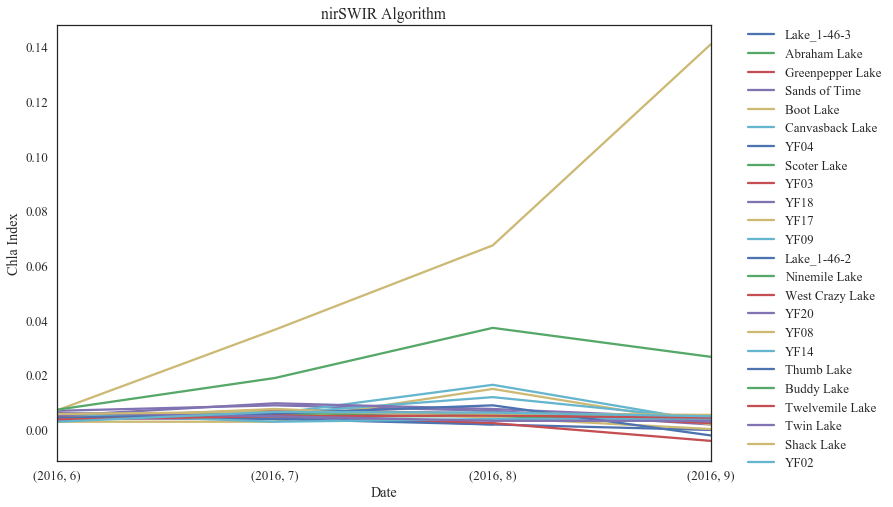

In [222]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

nirSWIR_df = nirSWIR_raw.set_index(pd.DatetimeIndex(nirSWIR_raw['system:time_start']))
nirSWIR  = nirSWIR_df.groupby([(nirSWIR_df.index.year),(nirSWIR_df.index.month)]).mean()
nirSWIR.plot() ## Can change to kind = 'bar' 
plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('nirSWIR Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_nirSWIR_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


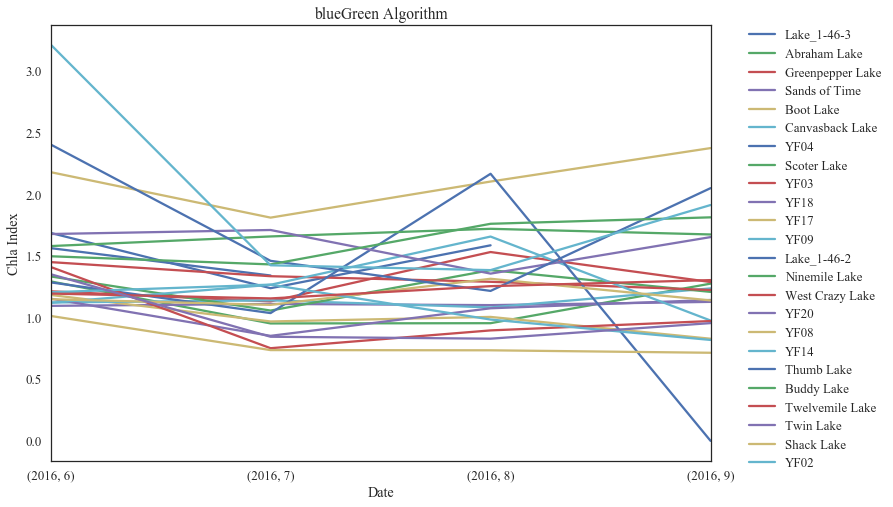

In [223]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

bG_df = blueGreen_raw.set_index(pd.DatetimeIndex(blueGreen_raw['system:time_start']))
bG  = bG_df.groupby([(bG_df.index.year),(bG_df.index.month)]).mean()
bG.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('blueGreen Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_blueGreen_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


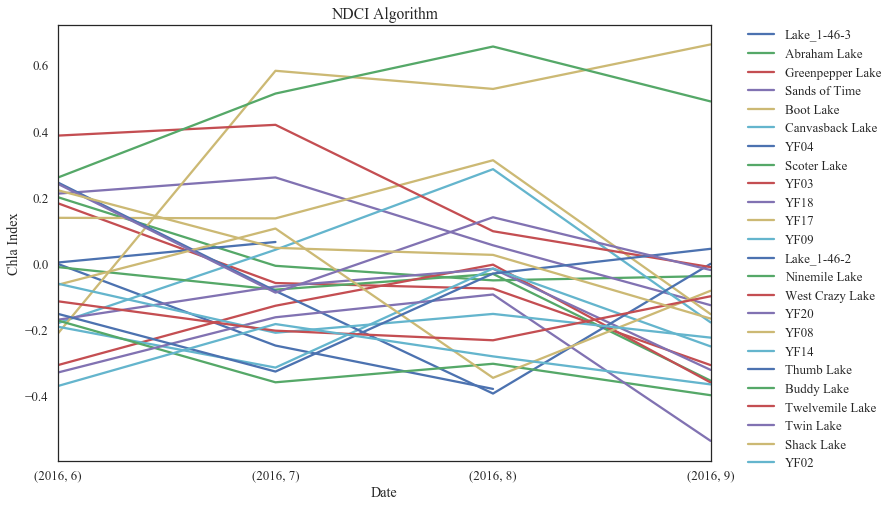

In [224]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

NDCI_df = NDCI_raw.set_index(pd.DatetimeIndex(NDCI_raw['system:time_start']))
NDCI  = NDCI_df.groupby([(NDCI_df.index.year),(NDCI_df.index.month)]).mean()
NDCI.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('NDCI Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_NDCI_bar.png', dpi = 300)

/Users/ckuhn/Documents/ABOVE/Figures


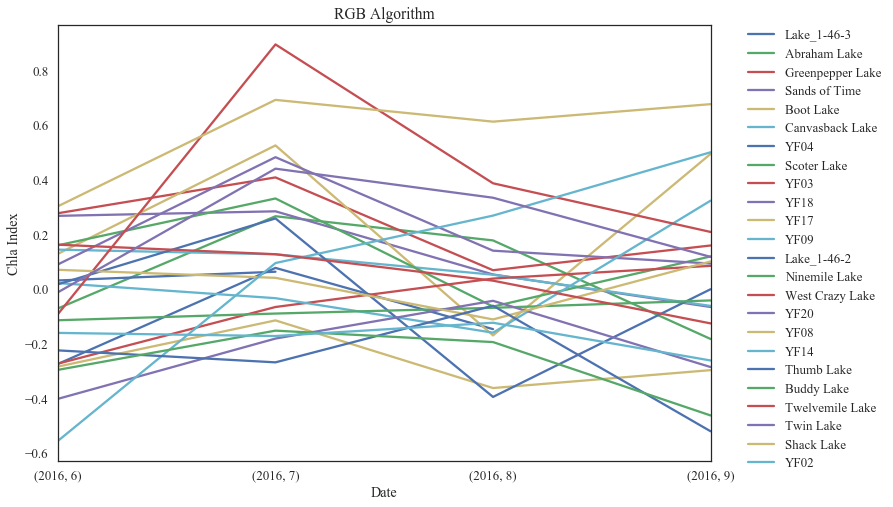

In [225]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

rgb_df = rgb_raw.set_index(pd.DatetimeIndex(rgb_raw['system:time_start']))
RGB  = rgb_df.groupby([(rgb_df.index.year),(rgb_df.index.month)]).mean()
RGB.plot()

plt.ylabel('Chla Index')
plt.xlabel('Date')
plt.title('RGB Algorithm')


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('L8_rgb_bar.png', dpi = 300)

### Monthly Averages Per Algorithms

In [226]:
# Melt them all 
df1 = pd.melt(NDCI_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df2 = pd.melt(rgb_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df3 = pd.melt(nirSWIR_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')
df4 = pd.melt(blueGreen_raw, id_vars=['system:time_start'], var_name='Lake', value_name = 'Reflectance')

df4.head(1)

,system:time_start,Lake,Reflectance
0,"Jun 1, 2016",Lake_1-46-3,NaN


In [227]:
# Add column with categorical
df1['Algorithm'] = 'NDCI'
df2['Algorithm'] = 'RGB'
df3['Algorithm'] = 'nirSWIR'
df4['Algorithm'] = 'blueGreen'

In [228]:
df3.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 1, 2016",Lake_1-46-3,NaN,nirSWIR


In [229]:
df1['Reflectance'].min()

-0.73999999999999999

In [230]:
# Concatenate
boss = df1.append(df2).append(df3).append(df4)

In [231]:
print(boss.shape)
boss.head(1)

(5088, 4)


,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 1, 2016",Lake_1-46-3,NaN,NDCI


In [232]:
# Now resample to the month

boss0 = boss.set_index(pd.DatetimeIndex(boss['system:time_start']))
boss1 = boss0.resample("M").median()
boss2 = boss1.reset_index()
boss2.head(1)

,system:time_start,Reflectance
0,2016-06-30,0.008


In [233]:
#boss.groupby(['system:time_start', 'Algorithm']).mean()#.plot(kind = 'bar')
bossx = boss0.dropna()
grouper = bossx.groupby([pd.TimeGrouper('1M'), 'Algorithm'])
grouper['Algorithm'].count()

system:time_start  Algorithm
2016-06-30         NDCI         110
                   RGB          110
                   blueGreen    110
                   nirSWIR      110
2016-07-31         NDCI          59
                   RGB           59
                   blueGreen     59
                   nirSWIR       59
2016-08-31         NDCI          54
                   RGB           54
                   blueGreen     54
                   nirSWIR       54
2016-09-30         NDCI          52
                   RGB           52
                   blueGreen     52
                   nirSWIR       52
Name: Algorithm, dtype: int64

In [234]:
result = grouper['Reflectance'].mean().unstack('Algorithm')
result
#https://stackoverflow.com/questions/32012012/pandas-resample-timeseries-with-groupby

Algorithm,NDCI,RGB,blueGreen,nirSWIR
system:time_start,,,,
2016-06-30,-0.027527,-0.036555,1.508773,0.005027
2016-07-31,-0.005085,0.138847,1.225644,0.008102
2016-08-31,-0.008852,0.012667,1.309815,0.010537
2016-09-30,-0.092750,-0.017904,1.274788,0.007135


In [235]:
stderr = grouper['Reflectance'].std().unstack('Algorithm')
stderr

Algorithm,NDCI,RGB,blueGreen,nirSWIR
system:time_start,,,,
2016-06-30,0.234907,0.316119,1.154989,0.002510
2016-07-31,0.317799,0.360855,0.348825,0.008364
2016-08-31,0.338191,0.251464,0.381001,0.014590
2016-09-30,0.285822,0.353445,0.497806,0.020355


In [236]:
stderr = grouper['Reflectance'].min().unstack('Algorithm')
stderr

Algorithm,NDCI,RGB,blueGreen,nirSWIR
system:time_start,,,,
2016-06-30,-0.505,-1.152,0.000,-0.001
2016-07-31,-0.740,-0.581,0.651,-0.001
2016-08-31,-0.608,-0.483,0.718,0.001
2016-09-30,-0.591,-0.708,0.000,-0.010


/Users/ckuhn/Documents/ABOVE/Figures


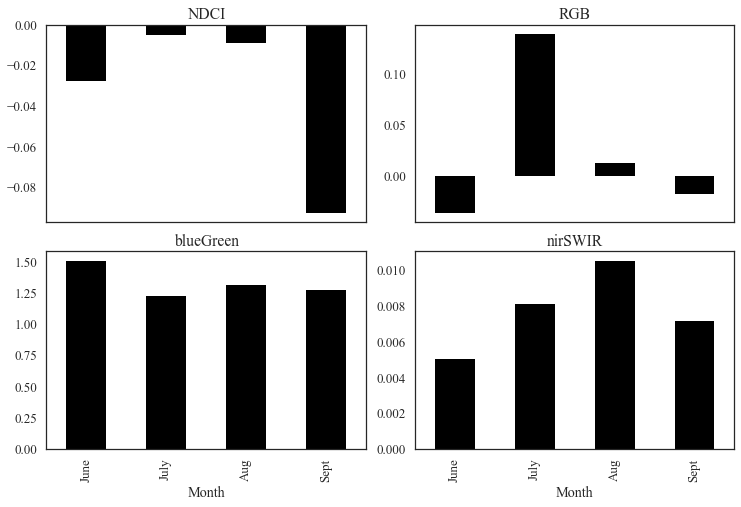

In [237]:
fig, ax = plt.subplots(2, 2)

result['NDCI'].plot(kind= 'bar', color ='black', ax=ax[0,0]) #no need to specify for first axis
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('NDCI')
ax[0, 0].set_xticklabels([])

result['RGB'].plot(kind= 'bar', color ='black', ax=ax[0, 1]) #no need to specify for first axis
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('RGB')
ax[0, 1].set_xticklabels([])

result['blueGreen'].plot(kind= 'bar', color ='black', ax=ax[1, 0]) #no need to specify for first axis
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_title('blueGreen')
labels = ['June','July', 'Aug', 'Sept']
ax[1, 0].set_xticklabels(labels)

result['nirSWIR'].plot(kind= 'bar', color ='black', ax=ax[1, 1]) #no need to specify for first axis
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_title('nirSWIR')
ax[1, 1].set_xticklabels(labels)

plt.tight_layout()

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_alg_bar_l8.png', dpi = 300)

In [238]:
df2.head(1)

,system:time_start,Lake,Reflectance,Algorithm
0,"Jun 1, 2016",Lake_1-46-3,NaN,RGB


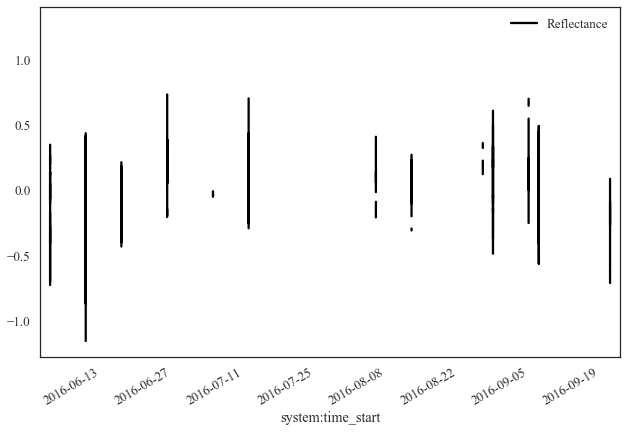

In [239]:
## RGB plots 
#df2 = df2.sort_values('system:time_start', ascending=True)
df2 = df2.set_index(pd.DatetimeIndex(df2['system:time_start']))
df2.plot(y = 'Reflectance', color ='black') 

/Users/ckuhn/Documents/ABOVE/Figures


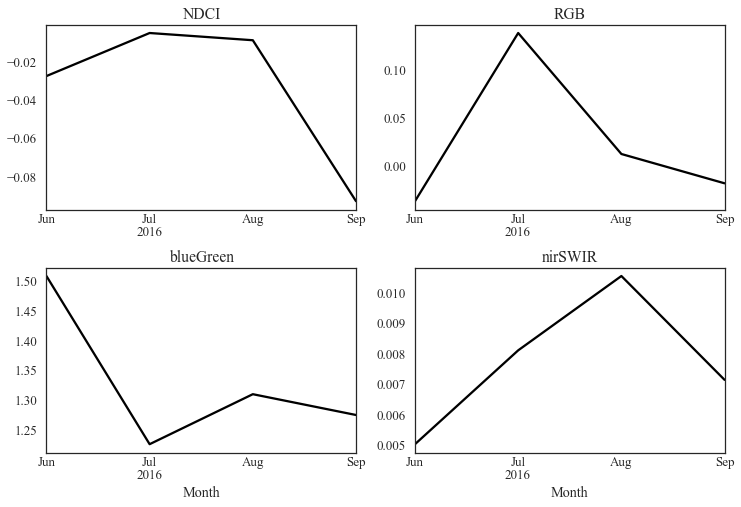

In [240]:
fig, ax = plt.subplots(2, 2)

result['NDCI'].plot(color ='black', ax=ax[0,0]) #no need to specify for first axis
ax[0, 0].set_xlabel('')
ax[0, 0].set_title('NDCI')
ax[0, 0].set_xticklabels([])

result['RGB'].plot(color ='black', ax=ax[0, 1]) #no need to specify for first axis
ax[0, 1].set_xlabel('')
ax[0, 1].set_title('RGB')
ax[0, 1].set_xticklabels([])


result['blueGreen'].plot(color ='black', ax=ax[1, 0]) #no need to specify for first axis
ax[1, 0].set_xlabel('Month')
ax[1, 0].set_title('blueGreen')
labels = ['June','July', 'Aug', 'Sept']
ax[1, 0].set_xticklabels(labels)

result['nirSWIR'].plot(color ='black', ax=ax[1, 1]) #no need to specify for first axis
ax[1, 1].set_xlabel('Month')
ax[1, 1].set_title('nirSWIR')
ax[1, 1].set_xticklabels(labels)

plt.tight_layout()


%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('overall_line_line.png', dpi = 300)

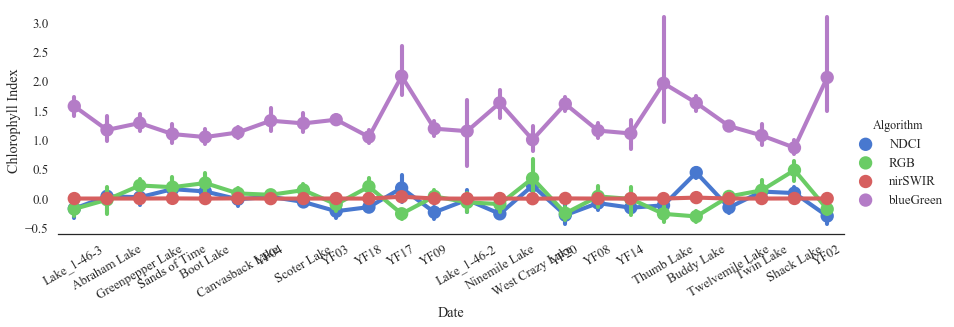

In [241]:
g = sns.factorplot(x="Lake", y="Reflectance", hue="Algorithm", data=boss,
                   palette="muted", size=4, aspect=3)

g.despine(left=True)
g.set_ylabels("Chlorophyll Index")
g.set_xlabels("Date")
g.set_xticklabels(rotation=30)

#plt.tight_layout()

/Users/ckuhn/Documents/ABOVE/Figures


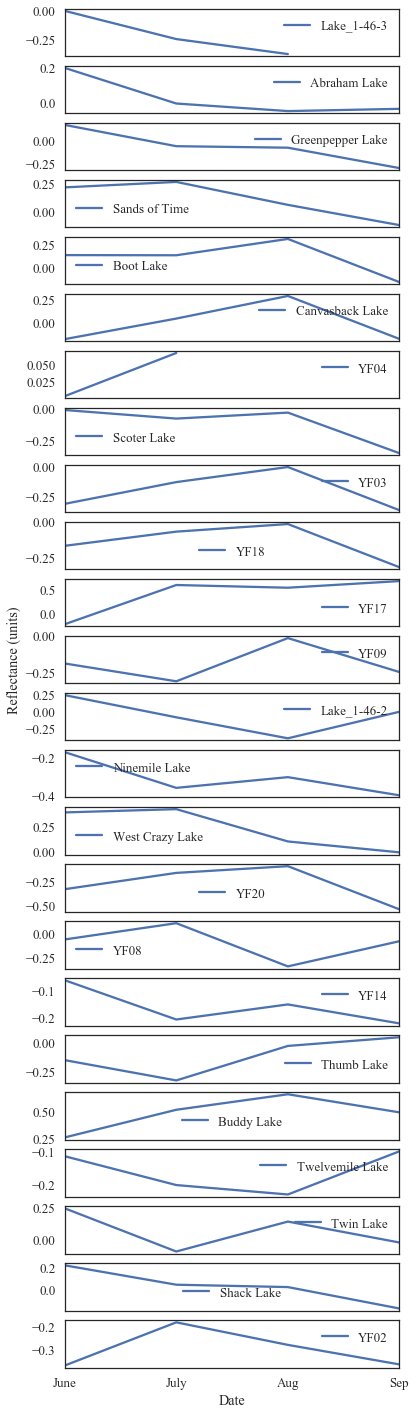

In [242]:
data = NDCI

#NDCI_raw = pd.read_csv('NDCI.csv', low_memory=False)
#rgb_raw = pd.read_csv('rgb.csv', low_memory=False)
#blueGreen_raw = pd.read_csv('blueGreen.csv', low_memory=False)
#nirSWIR_raw = pd.read_csv('nirSWIR.csv', low_memory=False)

fig, ax = plt.subplots(len(data.columns))
for idx in range(len(data.columns)):
    data[data.columns[idx]].plot(ax=ax[idx])

ax[idx//2].set_ylabel("Reflectance (units)")

# Retrieve an element of a plot and set properties
for idx in range(len(data.columns)):
    ax[idx].set_xticklabels('')
    ax[idx].legend()
    
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")
ax[idx].set_xlabel("Date")

ax[idx].set_xticklabels(['June','', 'July','', 'Aug','', 'Sep'])

fig.set_size_inches([6, 25])

%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('indv_TS_rgb.png', dpi = 300)

### Chla Index By Lake for Matt

/Users/ckuhn/Documents/ABOVE/Figures


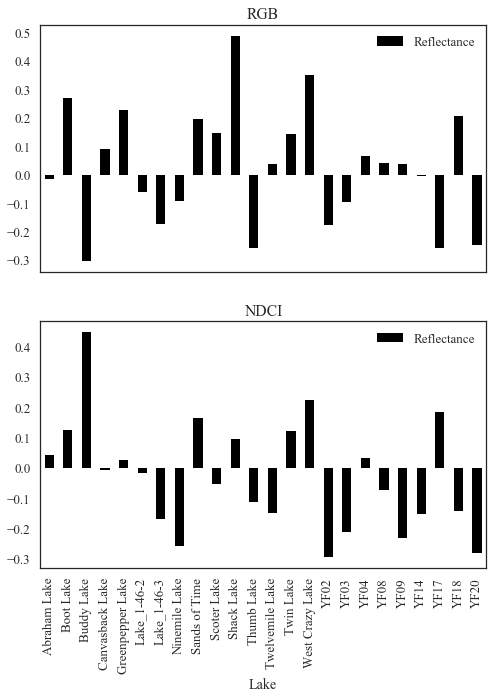

In [243]:
def set_style():
    plt.style.use(['seaborn-white', 'seaborn-talk'])
    plt.rc("font", family="Times New Roman")
    
set_style()   

fig, ax = plt.subplots(2)

df2.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[0])
ax[0].set_xlabel('')
ax[0].set_title('RGB')
ax[0].set_xticklabels([])

df1.groupby(['Lake']).mean().plot(kind = 'bar',color ='black', ax=ax[1])
#ax[1].set_xlabel('')
ax[1].set_title('NDCI')
#ax[1].set_xticklabels([])

fig.set_size_inches([8, 10])


#plt.tight_layout()
%cd /Users/ckuhn/Documents/ABOVE/figures
plt.savefig('RGB_NCDI_L8_bar.png', dpi = 300)

In [244]:
g1 = df2.groupby(['Lake']).mean()
g2 = df1.groupby(['Lake']).mean()


g1 = g1.reset_index()
g2 = g2.reset_index()

g2

g2['RGB Chla Index'] = g2['Reflectance']
g1['NDCI Chla Index'] = g1['Reflectance']

concat = pd.concat([g1,g2])
concat = concat.drop('Reflectance')
print(concat)

# concat.to_csv('alg_results_for_matt.csv')

                Lake  NDCI Chla Index  RGB Chla Index  Reflectance
0       Abraham Lake        -0.014778             NaN    -0.014778
1          Boot Lake         0.269111             NaN     0.269111
2         Buddy Lake        -0.300357             NaN    -0.300357
3    Canvasback Lake         0.091875             NaN     0.091875
4   Greenpepper Lake         0.227500             NaN     0.227500
5        Lake_1-46-2        -0.059375             NaN    -0.059375
6        Lake_1-46-3        -0.172333             NaN    -0.172333
7      Ninemile Lake        -0.090000             NaN    -0.090000
8      Sands of Time         0.198385             NaN     0.198385
9        Scoter Lake         0.148500             NaN     0.148500
10        Shack Lake         0.488833             NaN     0.488833
11        Thumb Lake        -0.256067             NaN    -0.256067
12   Twelvemile Lake         0.040571             NaN     0.040571
13         Twin Lake         0.145333             NaN     0.14